<a href="https://colab.research.google.com/github/superadi04/BibTeX-Parser/blob/master/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityachebrolur","key":"25b8a7ef8d39b955e30e6480868f8365"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download dataset
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 95% 315M/330M [00:02<00:00, 109MB/s]
100% 330M/330M [00:02<00:00, 121MB/s]


In [ ]:
!unzip face-mask-12k-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [ ]:
import os 
import cv2

data_dir = '/content/Face Mask Dataset'
labels = ['WithMask', 'WithoutMask']

def get_data(label):
  path = os.path.join(data_dir, label)
  images = []
  for label in labels:
    label_path = os.path.join(path, label)
    for img in os.listdir(label_path):
      img_path = os.path.join(label_path, img)
      img = cv2.imread(img_path)
      images.append([img, 1 if label == 'WithMask' else 0])
  return images
 
train = get_data('Train')
test = get_data('Test')
val = get_data('Validation')

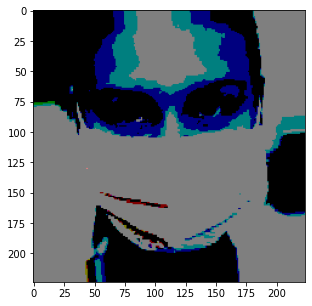

Image Size: (97, 97, 3)
Type: 1
<class 'numpy.ndarray'>


In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.show()
print("Image Size: " + str(train[6000][0].shape)) 
print("Type: " + str(train[423][1]))
print(type(train[423][0]))

In [ ]:
import tensorflow as tf

IMG_SIZE = 224

def resize_images(dataset):
  count = 0
  for count in range(len(dataset)):
    if (dataset[count][0].shape[0] != IMG_SIZE):
      dataset[count][0] = tf.image.resize(dataset[count][0], (224, 224))
    count += 1
  return dataset

train = resize_images(train)
val = resize_images(val)
test = resize_images(test)

In [ ]:
mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling='max'
)

model = tf.keras.models.Sequential([mobilenet,
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1, activation='sigmoid'),
])

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

X_train = np.asarray([row[0] for row in train]).astype('float32')
y_train = np.asarray([row[1] for row in train]).astype('float32')
X_val = np.asarray([row[0] for row in val]).astype('float32')
y_val = np.asarray([row[1] for row in val]).astype('float32')
X_test = np.asarray([row[0] for row in test]).astype('float32')
y_test = np.asarray([row[1] for row in test]).astype('float32')

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history = model.fit(x=X_train, 
                    y=y_train
                    epochs=10,
                    verbose=1,
                    callbacks=[early_stopping, mcp_save],
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/10
313/313 [==============================] - 343s 1s/step - loss: 0.0980 - accuracy: 0.9813 - val_loss: 1.4466 - val_accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
313/313 [==============================] - 340s 1s/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 3.8472 - val_accuracy: 0.5775
Epoch 3/10
313/313 [==============================] - 343s 1s/step - loss: 0.0123 - accuracy: 0.9967 - val_loss: 1.0747 - val_accuracy: 0.9125
Epoch 4/10
313/313 [==============================] - 342s 1s/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.3382 - val_accuracy: 0.9625
Epoch 5/10
313/313 [==============================] - 337s 1s/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.0425 - val_accuracy: 0.9950
Epoch 6/10
313/313 [==============================] - 337s 1s/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 1.5327 - val_accuracy: 0.8150
Epoch 7/10
313/313 [==============================] - 333s 1s/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.1305 - val_accuracy: 0.9762
Epoch 8/10
313/313 [==============================] - 334s 1s/step - loss: 0.0094 - accuracy: 0.9976 - val_loss: 0.0630 - val_accuracy: 0.9962

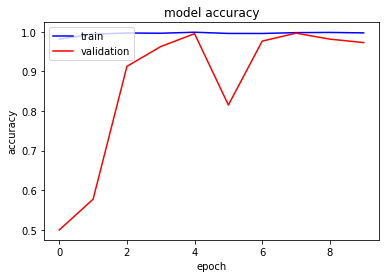

In [ ]:
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

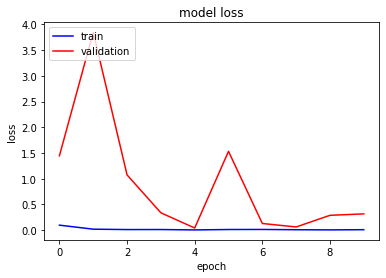

In [ ]:
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_hat = model.predict(X_test)
y_hat = np.round(y_hat, decimals=0)

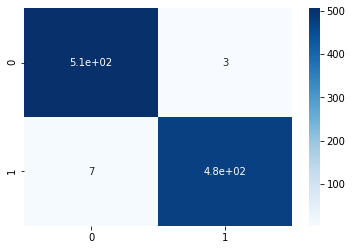

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# Print classification metrics
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_hat) * 100))
print("Precision: %.2f%%" % (precision_score(y_test, y_hat) * 100))
print("Recall: %.2f%%" % (recall_score(y_test, y_hat) * 100))
print("F1 Score: %.2f%%" % (f1_score(y_test, y_hat) * 100))

Accuracy: 98.99%
Precision: 99.37%
Recall: 98.55%
F1 Score: 98.96%
